In [1]:
mkdir /home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/

mkdir: cannot create directory `/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages/': File exists


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from anchor.visualize import MODALITY_TO_COLOR, MODALITY_ORDER, MODALITY_PALETTE
modality_order = MODALITY_ORDER

sns.set(style='ticks', context='talk', rc={'font.sans-serif':'Arial', 'pdf.fonttype': 42})

%matplotlib inline

%load_ext autoreload
%autoreload 2

folder = '/home/obotvinnik/Dropbox/figures2/singlecell_pnm/figure4_voyages'

import flotilla
study = flotilla.embark('singlecell_pnm_figure2_modalities_bayesian', 
                        flotilla_dir='/projects/ps-yeolab/obotvinnik/flotilla_projects/')
# study = flotilla.embark('singlecell_pnm_figure1_supplementary_post_splicing_filtering')

/home/obotvinnik/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:810: UserWarning: Found matplotlib configuration in ~/.matplotlib/. To conform with the XDG base directory standard, this configuration location has been deprecated on Linux, and the new location is now /home/obotvinnik/.config/matplotlib/. Please move your configuration there to ensure that matplotlib will continue to find it in the future.
  _get_xdg_config_dir())
/home/obotvinnik/anaconda/lib/python2.7/site-packages/flotilla/__init__.py:55: DtypeWarning: Columns (11,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  load_species_data=load_species_data)


2016-03-14 15:32:02	Reading datapackage from /projects/ps-yeolab/obotvinnik/flotilla_projects/singlecell_pnm_figure2_modalities_bayesian/datapackage.json
2016-03-14 15:32:02	Parsing datapackage to create a Study object
2016-03-14 15:33:03	Initializing Study
2016-03-14 15:33:03	Initializing Predictor configuration manager for Study
2016-03-14 15:33:03	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2016-03-14 15:33:03	Added ExtraTreesClassifier to default predictors
2016-03-14 15:33:03	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2016-03-14 15:33:03	Added ExtraTreesRegressor to default predictors
2016-03-14 15:33:03	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2016-03-14 15:33:03	Added GradientBoostingClassifier to default predictors
2016-03-14 15:33:03	Predictor GradientBoostingRegressor is of type <class 'sklearn.

In [5]:
modality_transitions = study.supplemental.modalities_tidy.merge(
    study.supplemental.modalities_tidy, left_on='event_id', right_on='event_id')
modality_transitions.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
0,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
1,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included
2,MN,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,iPSC,included
3,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
4,NPC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,NPC,included


In [6]:
rows = (modality_transitions.phenotype_x == 'iPSC') & (modality_transitions.phenotype_y == 'MN')
ipsc_mn_modalities = modality_transitions.loc[rows]
ipsc_mn_modalities.head()

,phenotype_x,event_id,modality_x,phenotype_y,modality_y
6,iPSC,exon:chr10:102114184-102114389:+@exon:chr10:10...,included,MN,included
15,iPSC,exon:chr10:102286732-102286831:-@exon:chr10:10...,included,MN,included
24,iPSC,exon:chr10:103360960-103361093:+@exon:chr10:10...,excluded,MN,bimodal
33,iPSC,exon:chr10:103563492-103563776:-@exon:chr10:10...,included,MN,bimodal
42,iPSC,exon:chr10:103567487-103567658:-@exon:chr10:10...,bimodal,MN,included


In [10]:
ipsc_mn_modality_count = ipsc_mn_modalities.groupby(['modality_x', 'modality_y']).size()
ipsc_mn_modality_count.head()

modality_x  modality_y
ambivalent  bimodal       22
            excluded       1
bimodal     bimodal       64
            excluded      19
            included      30
dtype: int64

In [11]:
ipsc_mn_modality_2d = ipsc_mn_modality_count.unstack()
ipsc_mn_modality_2d.head()

modality_y,ambivalent,bimodal,excluded,included
modality_x,,,,
ambivalent,NaN,22,1,NaN
bimodal,NaN,64,19,30
concurrent,NaN,NaN,NaN,1
excluded,1,63,478,3
included,NaN,151,NaN,1409


In [12]:
ipsc_mn_modality_2d.index.name = 'iPSC'
ipsc_mn_modality_2d.columns.name = 'MN'
ipsc_mn_modality_2d.head()

MN,ambivalent,bimodal,excluded,included
iPSC,,,,
ambivalent,NaN,22,1,NaN
bimodal,NaN,64,19,30
concurrent,NaN,NaN,NaN,1
excluded,1,63,478,3
included,NaN,151,NaN,1409


In [13]:
from anchor import MODALITY_ORDER

In [15]:
ipsc_mn_modality_2d = ipsc_mn_modality_2d.reindex(index=MODALITY_ORDER, columns=MODALITY_ORDER)
ipsc_mn_modality_2d

MN,excluded,bimodal,included,concurrent,ambivalent
iPSC,,,,,
excluded,478,63,3,NaN,1
bimodal,19,64,30,NaN,NaN
included,NaN,151,1409,NaN,NaN
concurrent,NaN,NaN,1,NaN,NaN
ambivalent,1,22,NaN,NaN,NaN


In [19]:
sns.set(style='ticks', context='paper')

In [25]:
sns.heatmap?

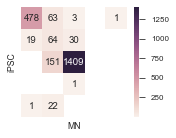

In [30]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(ipsc_mn_modality_2d, annot=True, fmt='g')
ax.set(xticks=[], yticks=[])
# fig.axes[-1].yaxis.locator_params()
fig.tight_layout()

### Get percentages for comparison - use % of events in both

In [33]:
percentages = 100*ipsc_mn_modality_2d/ipsc_mn_modality_2d.sum(axis=1).sum()
percentages

MN,excluded,bimodal,included,concurrent,ambivalent
iPSC,,,,,
excluded,21.320250,2.809991,0.133809,NaN,0.044603
bimodal,0.847458,2.854594,1.338091,NaN,NaN
included,NaN,6.735058,62.845674,NaN,NaN
concurrent,NaN,NaN,0.044603,NaN,NaN
ambivalent,0.044603,0.981267,NaN,NaN,NaN


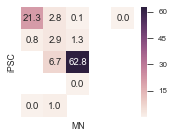

In [40]:
fig, ax = plt.subplots(figsize=(2.5, 2))
sns.heatmap(percentages, annot=True, fmt='.1f')
ax.set(xticks=[], yticks=[])
# fig.axes[-1].yaxis.locator_params()
fig.tight_layout()

In [45]:
sns.matrix._HeatMapper._annotate_heatmap??